In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,r2_score,plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [111]:
data=pd.read_csv(r'C:\Data Scientist Internship Projects\avocado.csv')

In [112]:
pd.get_option("display.max_columns")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [113]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [114]:
data.shape

(18249, 14)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [116]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [117]:
data1=data.drop(['Date','Small Bags','XLarge Bags','Large Bags'],axis=1)

In [118]:
corr=data1.corr()
corr

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.071552
year,-0.171667,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,1.000000


In [119]:
## Transform Object data
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
labelencoder=LabelEncoder()   
data1['year']=labelencoder.fit_transform(data1['year'])
data1['region']=labelencoder.fit_transform(data1['region'])
data1['type']=labelencoder.fit_transform(data1['type'])

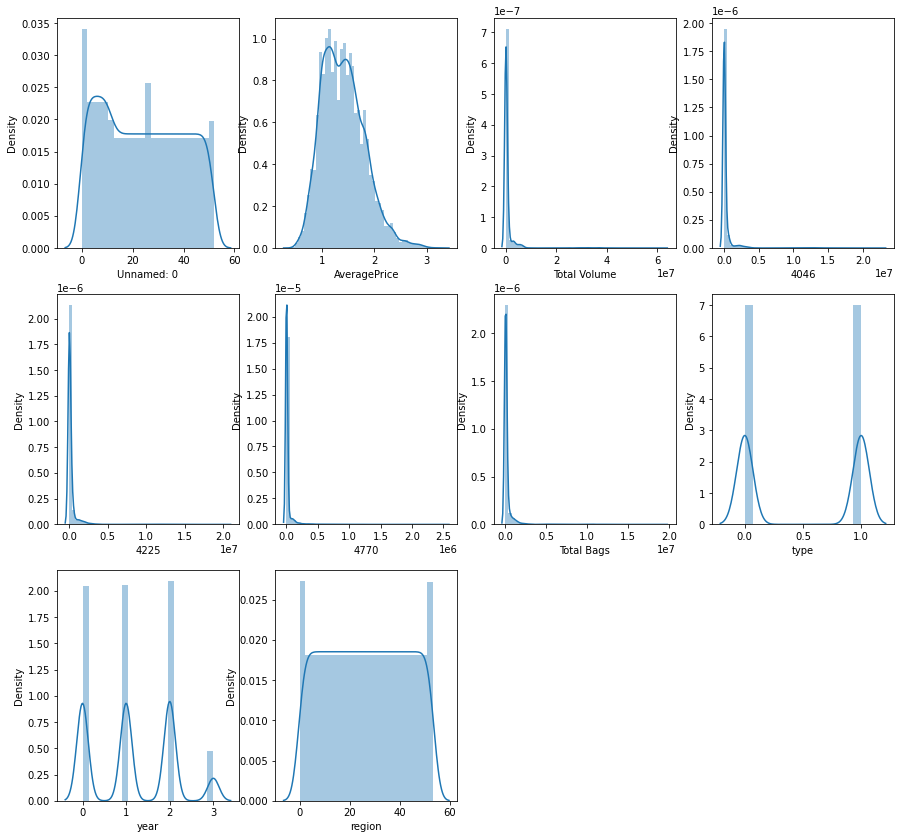

In [120]:
## for showing the skewness
plt.figure(figsize=(15,50))
plotnumber=1
for column in data1:
    if plotnumber<=11:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

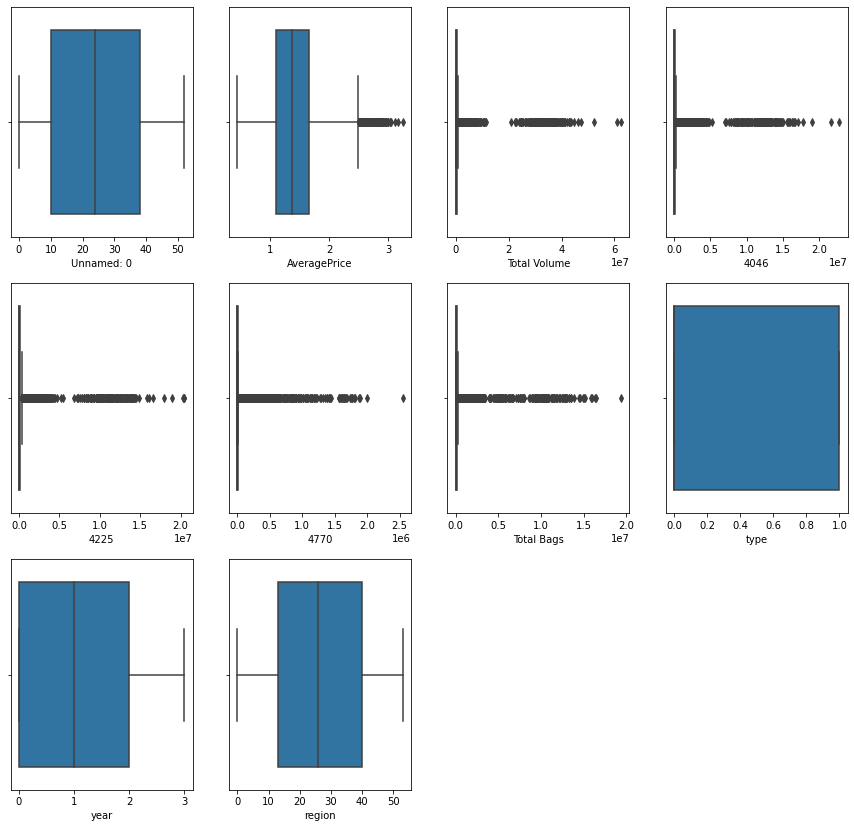

In [121]:
## for Detecting the Outliers
plt.figure(figsize=(15,50))
graph=1
for column in data1:
    if graph<=34:
        ax=plt.subplot(10,4,graph)
        sns.boxplot(data1[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [122]:
## By using Zscore
from scipy.stats import zscore
z_score= zscore(data1[['AveragePrice','Total Bags']])
abs_z_score= np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
datanew=data1[filtering_entry]

In [123]:
x=datanew.drop(columns='AveragePrice',axis=1)
y=datanew[['AveragePrice']]

In [124]:
x.skew()

Unnamed: 0      0.101620
Total Volume    3.544630
4046            4.445039
4225            4.143119
4770            6.307911
Total Bags      4.165621
type           -0.005912
year            0.225227
region          0.014808
dtype: float64

In [125]:
scalar=StandardScaler()
X=scalar.fit_transform(x)
X

array([[-1.56623713, -0.39658388, -0.35747716, ..., -1.00296016,
        -1.21579474, -1.69420395],
       [-1.50172485, -0.40439573, -0.35819299, ..., -1.00296016,
        -1.21579474, -1.69420395],
       [-1.43721256, -0.35152745, -0.35795517, ..., -1.00296016,
        -1.21579474, -1.69420395],
       ...,
       [-0.98562656, -0.43870763, -0.35717069, ...,  0.99704858,
         1.97388758,  1.73461696],
       [-0.92111427, -0.43667242, -0.35650769, ...,  0.99704858,
         1.97388758,  1.73461696],
       [-0.85660198, -0.43560045, -0.35380769, ...,  0.99704858,
         1.97388758,  1.73461696]])

In [126]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.034496e+00,Unnamed: 0
1,5.836807e+08,Total Volume
2,1.042458e+08,4046
3,8.178278e+07,4225
4,9.621988e+05,4770
5,5.011566e+07,Total Bags
6,1.215035e+00,type
7,1.104688e+00,year
8,1.053318e+00,region


In [127]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [128]:
pd.crosstab(datanew['region'],datanew['type'], margins=True)

type,0,1,All
region,,,
0,169,169,338
1,169,168,337
2,169,169,338
3,169,160,329
4,169,169,338
5,169,169,338
6,168,169,337
7,169,163,332
8,169,169,338


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
lr=LogisticRegression()
kn=KNeighborsClassifier()

In [140]:
## Training with These Classifiers
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
lr.fit(x_train,y_train)
kn.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

In [144]:
## Check The Scores
dt.score(x_test,y_test)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [ ]:
rf.score(x_test,y_test)

In [ ]:
lr.score(x_test,y_test)

In [ ]:
kn.score(x_test,y_test)

In [141]:
## Cross Validation to check overfitting
## There might be some overfitting because now score is 73% 
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(),X,y1,cv=5)
cross_val_score(knn,X,y1,cv=5).mean()

NameError: name 'y1' is not defined

In [ ]:
## ROC AUC Curve Scoring

In [142]:
roc_auc_score(y_test,rf.predict(x_test))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
roc_auc_score(y_test,lr.predict(x_test))

In [ ]:
roc_auc_score(y_test,kn.predict(x_test))

In [ ]:
roc_auc_score(y_test,dt.predict(x_test))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [143]:
ada= AdaBoostClassifier()
ada.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
y_pred=ada.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))